### **Лабораторная Работа №3**

In [ ]:
# ==============================================================================
# ШАГ 1: ИМПОРТ БИБЛИОТЕК И ЗАГРУЗКА ДАННЫХ
# ==============================================================================
# Импортируем все необходимые инструменты для нашего исследования
import pandas as pd
import numpy as np

# Библиотеки для статистического анализа
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков для лучшей читаемости
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 7)

# Загружаем наши подготовленные данные из CSV файлов
# --- Для Задачи 1 ---
df1_2025 = pd.read_csv('task1_part1-2_data_2025.csv')
df1_multiyear = pd.read_csv('task1_part3_data_2023-2025.csv')
# --- Для Задачи 2 ---
df2_cwe = pd.read_csv('task2_correlation_cwe_2025.csv')
# --- Для Задачи 3 ---
df3_vendors = pd.read_csv('task3_correlation_vendors_2025.csv')

print("--- Данные для Задачи 1 (2025 год) ---")
print(df1_2025.head(), "\n")
print("--- Данные для Задачи 1 (2023-2025) ---")
print(df1_multiyear.head(), "\n")
print("--- Данные для Задачи 2 ---")
print(df2_cwe.head(), "\n")
print("--- Данные для Задачи 3 ---")
print(df3_vendors.head(), "\n")

--- Данные для Задачи 1 (2025 год) ---
   Year Month Factor_Category           Factor_Name  Count
0  2025   Jan          Тип ПО  операционная система    452
1  2025   Feb          Тип ПО  операционная система    440
2  2025   Mar          Тип ПО  операционная система    435
3  2025   Apr          Тип ПО  операционная система    445
4  2025   May          Тип ПО  операционная система    424 

--- Данные для Задачи 1 (2023-2025) ---
   Year Month Factor_Category                          Factor_Name  Count
0  2023   Jan          Тип ПО  прикладное по информационных систем    330
1  2023   Feb          Тип ПО  прикладное по информационных систем    335
2  2023   Mar          Тип ПО  прикладное по информационных систем    328
3  2023   Apr          Тип ПО  прикладное по информационных систем    340
4  2023   May          Тип ПО  прикладное по информационных систем    324 

--- Данные для Задачи 2 ---
  Month  CWE-79  cwe-119  cwe-416  cwe-476  cwe-125  cwe-120  cwe-20  cwe-787
0   Jan      

In [ ]:
# ==============================================================================
# ЗАДАЧА 1.1: ОДНОФАКТОРНЫЙ ANOVA
# Цель: выяснить, как каждый фактор ПО ОТДЕЛЬНОСТИ влияет на число уязвимостей.
# ==============================================================================

print("\n" + "="*50)
print(" ЗАДАЧА 1.1: АНАЛИЗ ВЛИЯНИЯ КАЖДОГО ФАКТОРА")
print("="*50 + "\n")

# --- Анализ влияния фактора 'Тип ПО' ---
# Фильтруем данные, чтобы остались только строки, относящиеся к типам ПО
df_soft_types = df1_2025[df1_2025['Factor_Category'] == 'Тип ПО']
# Строим модель: зависимая переменная Count, фактор - Factor_Name
model_soft = ols('Count ~ C(Factor_Name)', data=df_soft_types).fit()
anova_soft = sm.stats.anova_lm(model_soft, typ=2)

print("--- Влияние фактора 'Тип ПО' ---")
# H0: Среднее число уязвимостей одинаково для всех типов ПО.
# H1: Существуют типы ПО со статистически значимо различающимся средним числом уязвимостей.
print(anova_soft)

# Рассчитываем R-квадрат (степень влияния)
r_squared_soft = anova_soft['sum_sq'][0] / (anova_soft['sum_sq'][0] + anova_soft['sum_sq'][1])
print(f"\nКоэффициент детерминации R² = {r_squared_soft:.2f}")
print(f"Вывод: {r_squared_soft:.0%} вариации в количестве уязвимостей объясняется различиями между типами ПО.")
if anova_soft['PR(>F)'][0] < 0.05:
    print("Результат: Влияние фактора 'Тип ПО' СТАТИСТИЧЕСКИ ЗНАЧИМО.\n")
else:
    print("Результат: Влияние фактора 'Тип ПО' НЕ является статистически значимым.\n")


# --- Анализ влияния фактора 'Тип ошибки (CWE)' ---
df_cwe_types = df1_2025[df1_2025['Factor_Category'] == 'Тип ошибки']
model_cwe = ols('Count ~ C(Factor_Name)', data=df_cwe_types).fit()
anova_cwe = sm.stats.anova_lm(model_cwe, typ=2)

print("--- Влияние фактора 'Тип ошибки (CWE)' ---")
# H0: Среднее число уязвимостей одинаково для всех типов ошибок CWE.
# H1: Существуют типы ошибок со статистически значимо различающимся средним числом уязвимостей.
print(anova_cwe)
r_squared_cwe = anova_cwe['sum_sq'][0] / (anova_cwe['sum_sq'][0] + anova_cwe['sum_sq'][1])
print(f"\nКоэффициент детерминации R² = {r_squared_cwe:.2f}")
print(f"Вывод: {r_squared_cwe:.0%} вариации в количестве уязвимостей объясняется различиями между типами ошибок.")
if anova_cwe['PR(>F)'][0] < 0.05:
    print("Результат: Влияние фактора 'Тип ошибки (CWE)' СТАТИСТИЧЕСКИ ЗНАЧИМО.\n")
else:
    print("Результат: Влияние фактора 'Тип ошибки (CWE)' НЕ является статистически значимым.\n")

# ==============================================================================
# ЗАДАЧА 1.2: ДВУХФАКТОРНЫЙ ANOVA
# Цель: сравнить, какой из факторов оказывает БОЛЕЕ СИЛЬНОЕ влияние.
# ==============================================================================
print("\n" + "="*50)
print(" ЗАДАЧА 1.2: СРАВНЕНИЕ СИЛЫ ВЛИЯНИЯ ФАКТОРОВ")
print("="*50 + "\n")

# Создаем объединенные данные для двухфакторного анализа
# (используем весь датасет df1_2025, где есть оба типа факторов)
model_two_factors = ols('Count ~ C(Factor_Category) + C(Month)', data=df1_2025).fit()
anova_two_factors = sm.stats.anova_lm(model_two_factors, typ=2)

print("--- Сравнение влияния 'Категории Фактора' (ПО vs Ошибка) и 'Месяца' ---")
# H0 для 'Категории': Тип ПО и Тип ошибки в среднем имеют одинаковое число уязвимостей.
# H0 для 'Месяца': Среднее число уязвимостей одинаково для всех месяцев.
print(anova_two_factors)
print("\nИнтерпретация: Сравниваем F-статистики для двух факторов.")
print("У какого фактора F-статистика больше (при p-value < 0.05), тот и оказывает более значимое влияние.")


 ЗАДАЧА 1.1: АНАЛИЗ ВЛИЯНИЯ КАЖДОГО ФАКТОРА

--- Влияние фактора 'Тип ПО' ---
                       sum_sq    df            F        PR(>F)
C(Factor_Name)  780206.533333   4.0  3947.348219  1.305543e-34
Residual          1235.333333  25.0          NaN           NaN

Коэффициент детерминации R² = 1.00
Вывод: 100% вариации в количестве уязвимостей объясняется различиями между типами ПО.
Результат: Влияние фактора 'Тип ПО' СТАТИСТИЧЕСКИ ЗНАЧИМО.

--- Влияние фактора 'Тип ошибки (CWE)' ---
                     sum_sq    df           F        PR(>F)
C(Factor_Name)  5378.133333   4.0  127.888396  2.919225e-16
Residual         262.833333  25.0         NaN           NaN

Коэффициент детерминации R² = 0.95
Вывод: 95% вариации в количестве уязвимостей объясняется различиями между типами ошибок.
Результат: Влияние фактора 'Тип ошибки (CWE)' СТАТИСТИЧЕСКИ ЗНАЧИМО.


 ЗАДАЧА 1.2: СРАВНЕНИЕ СИЛЫ ВЛИЯНИЯ ФАКТОРОВ

--- Сравнение влияния 'Категории Фактора' (ПО vs Ошибка) и 'Месяца' ---
             

/tmp/ipython-input-3068014684.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r_squared_soft = anova_soft['sum_sq'][0] / (anova_soft['sum_sq'][0] + anova_soft['sum_sq'][1])
/tmp/ipython-input-3068014684.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_soft['PR(>F)'][0] < 0.05:
/tmp/ipython-input-3068014684.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r_squared_cwe = anova_cwe['sum_sq'][0] / (anova_cwe['sum_

In [ ]:
# ==============================================================================
# ЗАДАЧА 1.3: ДВУХФАКТОРНЫЙ ANOVA С ПОВТОРЕНИЯМИ И ВЗАИМОДЕЙСТВИЕМ
# Цель: выяснить, есть ли совместное влияние факторов.
# ==============================================================================
print("\n" + "="*50)
print(" ЗАДАЧА 1.3: АНАЛИЗ ВЗАИМОДЕЙСТВИЯ ФАКТОРОВ (2023-2025)")
print("="*50 + "\n")

# Фильтруем данные для анализа типов ошибок по годам и месяцам
df_cwe_multiyear = df1_multiyear[df1_multiyear['Factor_Category'] == 'Тип ошибки']

# Формула 'Count ~ C(Year) * C(Month)' проверяет:
# 1. Влияние 'Года' (C(Year))
# 2. Влияние 'Месяца' (C(Month))
# 3. Их взаимодействие (C(Year):C(Month))
model_interaction = ols('Count ~ C(Year) * C(Month)', data=df_cwe_multiyear).fit()
anova_interaction = sm.stats.anova_lm(model_interaction, typ=2)

print("--- Влияние 'Года', 'Месяца' и их ВЗАИМОДЕЙСТВИЯ на число уязвимостей типа CWE ---")
print(anova_interaction)
print("\nИнтерпретация:")
print("1. Смотрим на p-value для C(Year) и C(Month) - это их основное влияние.")
print("2. Самое важное: смотрим на p-value для 'C(Year):C(Month)'.")

interaction_p_value = anova_interaction.loc['C(Year):C(Month)', 'PR(>F)']
if interaction_p_value < 0.05:
    print("Результат: ВЗАИМОДЕЙСТВИЕ статистически значимо. Это означает, что месячная динамика числа уязвимостей отличается от года к году.")
else:
    print("Результат: Взаимодействие НЕ является статистически значимым. Влияние месяца примерно одинаково в разные годы.")


 ЗАДАЧА 1.3: АНАЛИЗ ВЗАИМОДЕЙСТВИЯ ФАКТОРОВ (2023-2025)

--- Влияние 'Года', 'Месяца' и их ВЗАИМОДЕЙСТВИЯ на число уязвимостей типа CWE ---
                       sum_sq    df         F    PR(>F)
C(Year)           1038.722222   2.0  1.422691  0.266909
C(Month)            69.888889   5.0  0.038289  0.999050
C(Year):C(Month)    86.611111  10.0  0.023725  1.000000
Residual          6571.000000  18.0       NaN       NaN

Интерпретация:
1. Смотрим на p-value для C(Year) и C(Month) - это их основное влияние.
2. Самое важное: смотрим на p-value для 'C(Year):C(Month)'.
Результат: Взаимодействие НЕ является статистически значимым. Влияние месяца примерно одинаково в разные годы.



 ЗАДАЧА 2: КОРРЕЛЯЦИЯ МЕЖДУ ТИПАМИ ОШИБОК

--- Матрица корреляций Пирсона ---
           CWE-79   cwe-119   cwe-416   cwe-476   cwe-125   cwe-120    cwe-20  \
CWE-79   1.000000 -0.764118 -0.039811 -0.541848  0.681819 -0.710916 -0.403296   
cwe-119 -0.764118  1.000000 -0.325313  0.949178 -0.797310  0.345646  0.538263   
cwe-416 -0.039811 -0.325313  1.000000 -0.427921  0.151920 -0.008475 -0.528830   
cwe-476 -0.541848  0.949178 -0.427921  1.000000 -0.723693  0.185701  0.549634   
cwe-125  0.681819 -0.797310  0.151920 -0.723693  1.000000 -0.094950  0.000000   
cwe-120 -0.710916  0.345646 -0.008475  0.185701 -0.094950  1.000000  0.673056   
cwe-20  -0.403296  0.538263 -0.528830  0.549634  0.000000  0.673056  1.000000   
cwe-787  0.590971 -0.195196 -0.449869  0.091192  0.139415 -0.296722  0.054299   

          cwe-787  
CWE-79   0.590971  
cwe-119 -0.195196  
cwe-416 -0.449869  
cwe-476  0.091192  
cwe-125  0.139415  
cwe-120 -0.296722  
cwe-20   0.054299  
cwe-787  1.000000  


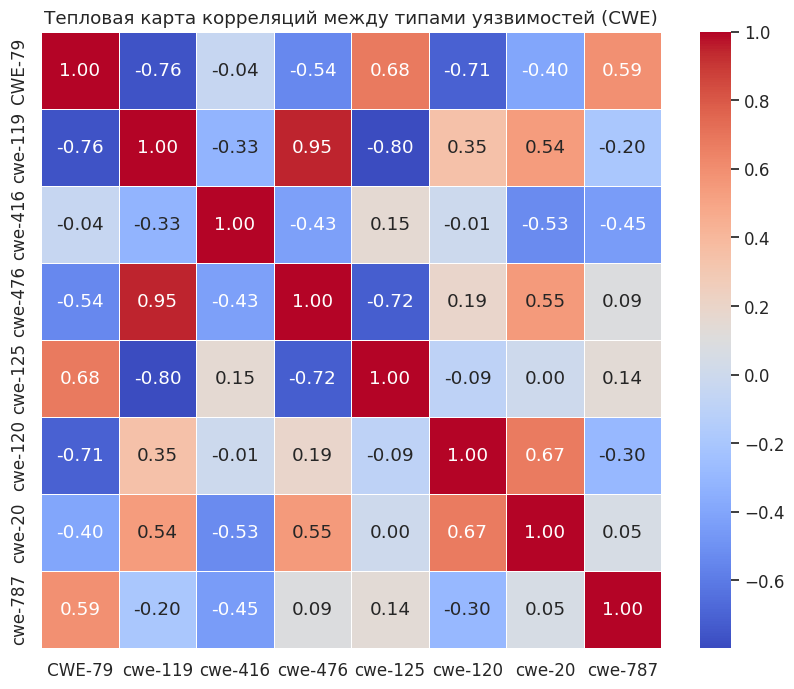


--- Матрица P-значений для коэффициентов корреляции (без предупреждений) ---
(Если p-value < 0.05, то корреляция статистически значима)
         CWE-79 cwe-119 cwe-416 cwe-476 cwe-125 cwe-120  cwe-20 cwe-787
CWE-79      0.0  0.0769  0.9403  0.2668  0.1358  0.1133  0.4279  0.2167
cwe-119  0.0769     0.0  0.5292  0.0038  0.0575  0.5022  0.2706  0.7109
cwe-120  0.1133  0.5022  0.9873  0.7246   0.858     0.0  0.1429   0.568
cwe-125  0.1358  0.0575  0.7739   0.104     0.0   0.858     1.0  0.7922
cwe-20   0.4279  0.2706  0.2807  0.2586     1.0  0.1429     0.0  0.9186
cwe-416  0.9403  0.5292     0.0  0.3973  0.7739  0.9873  0.2807  0.3707
cwe-476  0.2668  0.0038  0.3973     0.0   0.104  0.7246  0.2586  0.8636
cwe-787  0.2167  0.7109  0.3707  0.8636  0.7922   0.568  0.9186     0.0

--- Пары уязвимостей с ОЧЕНЬ СИЛЬНОЙ связью (|r| >= 0.9) ---
  Тип ошибки 1 Тип ошибки 2  Коэффициент r
0      cwe-119      cwe-476       0.949178


In [ ]:
# ==============================================================================
# ЗАДАЧА 2: КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ТИПОВ ОШИБОК (CWE)
# Цель: найти связи между частотой возникновения разных типов уязвимостей.
# ==============================================================================
print("\n" + "="*50)
print(" ЗАДАЧА 2: КОРРЕЛЯЦИЯ МЕЖДУ ТИПАМИ ОШИБОК")
print("="*50 + "\n")

# Убираем столбец 'Month', так как он не является переменной для корреляции
df_corr_cwe = df2_cwe.drop('Month', axis=1)

# 1. Расчет матрицы корреляций
corr_matrix = df_corr_cwe.corr()

print("--- Матрица корреляций Пирсона ---")
print(corr_matrix)

# 2. Визуализация с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Тепловая карта корреляций между типами уязвимостей (CWE)')
plt.show()

# 3. Проверка значимости корреляций (расчет p-value) - ИСПРАВЛЕННАЯ ВЕРСИЯ
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            # Используем .loc для надежного присваивания значения
            pvalues.loc[r, c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values_matrix = calculate_pvalues(df_corr_cwe)
print("\n--- Матрица P-значений для коэффициентов корреляции (без предупреждений) ---")
print("(Если p-value < 0.05, то корреляция статистически значима)")
print(p_values_matrix)


# 4. Поиск пар с "очень сильной" связью (по шкале Чеддока |r| >= 0.9)
# Создаем маску для выбора только сильных корреляций
strong_corr_mask = (corr_matrix.abs() >= 0.9) & (corr_matrix.abs() < 1.0)
strong_pairs = corr_matrix[strong_corr_mask].stack().reset_index()
strong_pairs.columns = ['Тип ошибки 1', 'Тип ошибки 2', 'Коэффициент r']
# Удаляем дубликаты (пара A-B такая же, как B-A)
strong_pairs['sorted_pair'] = strong_pairs.apply(lambda row: tuple(sorted((row['Тип ошибки 1'], row['Тип ошибки 2']))), axis=1)
strong_pairs = strong_pairs.drop_duplicates('sorted_pair').drop('sorted_pair', axis=1)

print("\n--- Пары уязвимостей с ОЧЕНЬ СИЛЬНОЙ связью (|r| >= 0.9) ---")
if strong_pairs.empty:
    print("В данном наборе данных пар с очень сильной корреляцией не найдено.")
else:
    print(strong_pairs)

In [ ]:
# ==============================================================================
# ЗАДАЧА 3: АНАЛИЗ МЕТРИК ПРОИЗВОДИТЕЛЕЙ
# ==============================================================================
print("\n" + "="*50)
print(" ЗАДАЧА 3: ЧАСТНАЯ И МНОЖЕСТВЕННАЯ КОРРЕЛЯЦИЯ")
print("="*50 + "\n")

# Для этой задачи нужна библиотека pingouin. Установим ее, если еще нет.
try:
    import pingouin as pg
except ImportError:
    print("Устанавливаем библиотеку pingouin...")
    !pip install pingouin
    import pingouin as pg


# 1. Простая парная корреляция для сравнения
print("--- Простая парная корреляция (для сравнения) ---")
simple_corr_vendors = df3_vendors[['Total_Vulns', 'Critical_Vulns', 'Incident_Vulns']].corr()
print(simple_corr_vendors)

# 2. Частная корреляция
# Цель: выяснить, какова связь, например, между Total_Vulns и Critical_Vulns,
# если убрать влияние переменной Incident_Vulns.
print("\n--- Матрица частных корреляций ---")
partial_corr_matrix = df3_vendors[['Total_Vulns', 'Critical_Vulns', 'Incident_Vulns']].pcorr()
print(partial_corr_matrix)
print("\nИнтерпретация: Сравните значения из этой таблицы с таблицей простой корреляции.")
print("Например, частная корреляция между Total_Vulns и Critical_Vulns показывает их связь, как если бы все производители имели одинаковое число инцидентов.")

# 3. Множественная корреляция
# Цель: выяснить, насколько хорошо две переменные (например, Critical и Incident)
# вместе объясняют изменчивость третьей переменной (Total_Vulns).

# Используем линейную регрессию, чтобы найти R-квадрат
from sklearn.linear_model import LinearRegression

# Подготовим данные:
# Отфильтруем строки, где Total_Vulns > 0, так как мы предсказываем именно эту переменную
df_regr = df3_vendors[df3_vendors['Total_Vulns'] > 0]
X = df_regr[['Critical_Vulns', 'Incident_Vulns']] # Независимые переменные
y = df_regr['Total_Vulns']                      # Зависимая переменная

# Строим и обучаем модель
model_regr = LinearRegression().fit(X, y)
# Коэффициент детерминации R²
r_squared = model_regr.score(X, y)
# Коэффициент множественной корреляции R - это корень из R²
multiple_corr_R = np.sqrt(r_squared)

print(f"\n--- Множественная корреляция ---")
print(f"Модель: Total_Vulns ~ Critical_Vulns + Incident_Vulns")
print(f"Коэффициент детерминации R-квадрат = {r_squared:.4f}")
print(f"Коэффициент множественной корреляции R = {multiple_corr_R:.4f}")
print(f"\nВывод: {r_squared:.0%} вариации в общем числе уязвимостей можно объяснить")
print("линейной зависимостью от числа критических уязвимостей и уязвимостей, связанных с инцидентами.")


 ЗАДАЧА 3: ЧАСТНАЯ И МНОЖЕСТВЕННАЯ КОРРЕЛЯЦИЯ

--- Простая парная корреляция (для сравнения) ---
                Total_Vulns  Critical_Vulns  Incident_Vulns
Total_Vulns        1.000000        0.593313        0.158421
Critical_Vulns     0.593313        1.000000        0.564788
Incident_Vulns     0.158421        0.564788        1.000000

--- Матрица частных корреляций ---
                Total_Vulns  Critical_Vulns  Incident_Vulns
Total_Vulns        1.000000        0.618348       -0.265961
Critical_Vulns     0.618348        1.000000        0.592340
Incident_Vulns    -0.265961        0.592340        1.000000

Интерпретация: Сравните значения из этой таблицы с таблицей простой корреляции.
Например, частная корреляция между Total_Vulns и Critical_Vulns показывает их связь, как если бы все производители имели одинаковое число инцидентов.

--- Множественная корреляция ---
Модель: Total_Vulns ~ Critical_Vulns + Incident_Vulns
Коэффициент детерминации R-квадрат = 0.6616
Коэффициент множественн